# Function Learning with DeepXDE

We use DeepXDE to learn a 1D function of the form

$$ f(x) = x \sin(5x) $$

A similar problem was previously coded by hand just using `pytorch`.

In [1]:
import deepxde as dde
import numpy as np

No backend selected.
Finding available backend...


Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Found pytorch
Setting the default backend to "pytorch". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Note that the `pytorch` backend is found automatically, it being in the conda environment.

In [2]:
def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)

Define 

- geometry
- training parameters (16 sampling points, 100 test points)
- network architecture, activation and initilization

In [3]:
geom = dde.geometry.Interval(-1, 1)
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

Instantiate the model and choose the optimizer.

In [4]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
'compile' took 0.000175 s



Train the model for 10000 iterations.

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.93e-01]    [2.52e-01]    [1.10e+00]    
1000      [3.20e-04]    [2.90e-04]    [3.72e-02]    
2000      [7.81e-05]    [1.01e-04]    [2.19e-02]    
3000      [3.28e-05]    [6.18e-05]    [1.72e-02]    
4000      [3.63e-05]    [5.64e-05]    [1.64e-02]    
5000      [7.72e-06]    [2.92e-05]    [1.18e-02]    
6000      [4.46e-06]    [2.43e-05]    [1.08e-02]    
7000      [2.68e-06]    [2.12e-05]    [1.01e-02]    
8000      [3.36e-06]    [2.10e-05]    [1.00e-02]    
9000      [8.83e-07]    [1.64e-05]    [8.85e-03]    
10000     [6.36e-07]    [1.44e-05]    [8.31e-03]    

Best model at step 10000:
  train loss: 6.36e-07
  test loss: 1.44e-05
  test metric: [8.31e-03]

'train' took 6.788644 s

Saving loss history to /Users/markasch/Dropbox/3Teaching/Assim/Assim_ML_2023_Caraga/02course-advanced/02Examples/01_SciML/loss.dat ...
Saving training data to /Users/markasch/Dropbox/3Teaching/Assim/Assim_ML_2023_Caraga/0

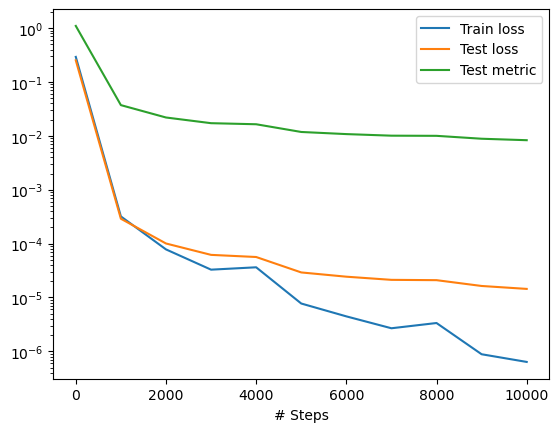

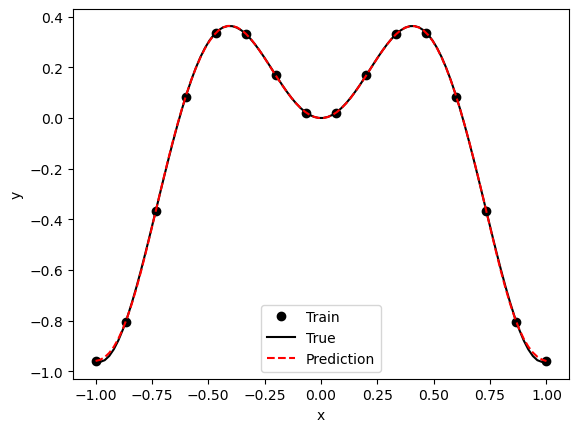

In [5]:
losshistory, train_state = model.train(iterations=10000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)